# Introduction to scikit-learn (sklearn)

this notebook demonstrates some of the most useful functions of the beautiful scikit-learn library

what we're going to cover:

0. an end-to-end scikit-learn workflow
1. getting the data ready
2. choose the right estimator/algorithm for our problems
3. fit the model/algorithm and use it to make predictions on our data
4. evaluating a model
5. improve a model
6. save and load a trained model
7. putting it all together!


In [133]:
what_were_covering = [
    "0. An end-to-end Scikit-Learn workflow",
    "1. Getting the data ready",
    "2. Choose the right estimator/algorithm for our problems",
    "3. Fit the model/algorithm and use it to make predictions on our data",
    "4. Evaluating a model",
    "5. Improve a model",
    "6. Save and load a trained model",
    "7. Putting it all together!"]
what_were_covering

['0. An end-to-end Scikit-Learn workflow',
 '1. Getting the data ready',
 '2. Choose the right estimator/algorithm for our problems',
 '3. Fit the model/algorithm and use it to make predictions on our data',
 '4. Evaluating a model',
 '5. Improve a model',
 '6. Save and load a trained model',
 '7. Putting it all together!']

## 0. an end-to-end scikit-learn workflow

In [134]:
# 1. getting the data ready
import pandas as pd
heart_disease = pd.read_csv("../data/heart-disease.csv")
heart_disease


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [135]:
# Create X (features matrix)
X = heart_disease.drop("target", axis=1) # drop the target column, axis=1 means column, axis=0 means row

# Create y (labels)
y = heart_disease["target"]

In [136]:
# 2. Choose the right model and hyperparameters

# import the RandomForestClassifier estimator class, this is a classification model (predicting a category)
# for example, predicting whether or not someone has heart disease based on their medical records, 
# 0 = no heart disease, 1 = heart disease
from sklearn.ensemble import RandomForestClassifier 
clf = RandomForestClassifier() # create an instance of the model, its a

# We'll keep the default hyperparameters
clf.get_params() # get the hyperparameters of the model

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [201]:
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [137]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [138]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [139]:
# 3. Fit the model to the training data
from sklearn.model_selection import train_test_split # import the train_test_split function from sklearn

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # split the data into training and test sets
# test_size=0.2 means 20% of the data will be used for testing, 80% for training

In [140]:
clf.fit(X_train, y_train); # fit the model to the training data

In [141]:
# make a prediction
y_preds = clf.predict(X_test)
y_preds

array([0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1])

In [142]:
y_test

232    0
59     1
278    0
229    0
135    1
      ..
71     1
63     1
115    1
18     1
267    0
Name: target, Length: 61, dtype: int64

In [143]:
# 4. Evaluate the model on the training data and test data
clf.score(X_train, y_train) # evaluate the model on the training data, testing with the training data
# it should be close to 100% accuracy because the model has already seen the data during training

1.0

In [144]:
clf.score(X_test, y_test) # evaluate the model on the test data, testing with the test data

0.7868852459016393

In [145]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score # import the classification_report, confusion_matrix, accuracy_score functions from sklearn

print(classification_report(y_test, y_preds)) # print the classification report, 
#comparing the test labels with the predictions made by the model

              precision    recall  f1-score   support

           0       0.69      0.78      0.73        23
           1       0.86      0.79      0.82        38

    accuracy                           0.79        61
   macro avg       0.77      0.79      0.78        61
weighted avg       0.79      0.79      0.79        61



In [146]:
confusion_matrix(y_test, y_preds) # print the confusion matrix, comparing the test labels with the predictions made by the model

array([[18,  5],
       [ 8, 30]])

In [147]:
accuracy_score(y_test, y_preds) # print the accuracy score, comparing the test labels with the predictions made by the model

0.7868852459016393

In [148]:
# 5. Improve the model
# Try different amount of n_estimators
import numpy as np
np.random.seed(42)

for i in range(10, 100, 10): # try different values of n_estimators from 10 to 100, with a step of 10
    print(f"Trying model with {i} estimators...")
    clf = RandomForestClassifier(n_estimators=i) # create a new model with n_estimators=i, n_estimators is a hyperparameter
    clf.fit(X_train, y_train) # create a new model with n_estimators=i
    print(f"Model accuracy on test set: {clf.score(X_test, y_test) * 100:.2f}%") # print the accuracy score of the model

Trying model with 10 estimators...
Model accuracy on test set: 77.05%
Trying model with 20 estimators...
Model accuracy on test set: 75.41%
Trying model with 30 estimators...
Model accuracy on test set: 80.33%
Trying model with 40 estimators...
Model accuracy on test set: 85.25%
Trying model with 50 estimators...
Model accuracy on test set: 80.33%
Trying model with 60 estimators...
Model accuracy on test set: 77.05%
Trying model with 70 estimators...
Model accuracy on test set: 80.33%
Trying model with 80 estimators...
Model accuracy on test set: 83.61%
Trying model with 90 estimators...
Model accuracy on test set: 78.69%


In [149]:
# 6. Save a model and load it
import pickle # import the pickle module

pickle.dump(clf, open("random_forest_model_1.pkl", "wb")) # save the model to a file, wb means write binary

In [150]:
loaded_model = pickle.load(open("random_forest_model_1.pkl", "rb")) # load the model from a file, rb means read binary
loaded_model.score(X_test, y_test) # evaluate the loaded model on the test data

0.7868852459016393

## 1. Getting our data ready to be used with machine learning

 3 main things we have to do:
 1. Split the data into features and labels (usually `X` & `y`)
 2. Filling (also called imputing) or disregarding missing values
 3. Converting non-numerical values to numerical values (also called feature encoding)


In [151]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [152]:
X=heart_disease.drop("target", axis=1) # remove the target column, axis=1 means column, axis=0 means row
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [153]:
y=heart_disease["target"] # get the target column
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [154]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split # import the train_test_split function from sklearn

# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, # X is the data we want to use to make predictions
                                                     y, # y is the labels we want to predict
                                                     test_size=0.2)
# test_size=0.2 means 20% of the data will be used for testing, 80% for training

In [155]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape # print the shapes of the training and test sets

((242, 13), (242,), (61, 13), (61,))

In [156]:
len(heart_disease) # print the length of the data

303

## 1.1 Make sure its all numerical, turn any non-numerical data into numerical data

In [157]:
car_sales = pd.read_csv("../data/car-sales-extended.csv") # read the car sales data
car_sales.head() # print the first 5 rows of the data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [158]:
len(car_sales) # print the length of the data

1000

In [159]:
car_sales.dtypes # print the data types of the data

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [160]:
# Split the data into X and y (features and labels)

# X is the data we want to use to make predictions, without the data we want to predict
X = car_sales.drop("Price", axis=1) # remove the Price column, axis=1 means column, axis=0 means row, 

# y is the labels(data) we want to predict
y = car_sales["Price"] # get the Price column

# Split the data into training and test sets
from sklearn.model_selection import train_test_split # import the train_test_split function from sklearn

# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, # X is the data we want to use to make predictions
                                                    y, # y is the labels we want to predict
                                                    test_size=0.2) # test_size=0.2 means 20% of the data will be used for testing, 80% for training
# X_train is the training data, y_train is the training labels
# X_test is the test data, y_test is the test labels to test the model on

In [161]:
# Build machine learning model
from sklearn.ensemble import RandomForestRegressor # import the RandomForestRegressor estimator class

model = RandomForestRegressor() # create an instance of the model, its a model for regression and it predicts a number

model.fit(X_train, y_train) # fit the model to the training data

ValueError: could not convert string to float: 'Toyota'

In [ ]:
X

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3
...,...,...,...,...
995,Toyota,Black,35820,4
996,Nissan,White,155144,3
997,Nissan,Blue,66604,4
998,Honda,White,215883,4


In [ ]:
# turn the categories into numbers, non-numerical data into numerical data
from sklearn.preprocessing import OneHotEncoder # import the OneHotEncoder class
from sklearn.compose import ColumnTransformer # import the ColumnTransformer class

# create a list of the categorical features, the features that are not numbers
categorical_features = ["Make", # the Make column is currently a string
                        "Colour", # the Colour column is currently a string
                        "Doors"] # the Doors column is currently a number but its a category, not a number (4 doors, 2 doors))

one_hot = OneHotEncoder() # create an instance of the OneHotEncoder class
# create an instance of the ColumnTransformer class
# the ColumnTransformer class transforms the data in the columns specified in the transformers parameter 
# using the transformers specified in the remainder parameter
transformer=ColumnTransformer([("one_hot", # create a transformer called one_hot
                                one_hot, # create an instance of the OneHotEncoder class
                                categorical_features)], # transform the data in the categorical_features columns
                                remainder="passthrough") # leave the data in the columns not specified in the categorical_features parameter as they are

transformed_X = transformer.fit_transform(X) # fit the transformer to the data and transform the data, changing the data into numbers
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [ ]:
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [ ]:
pd.DataFrame(transformed_X) # print the transformed data

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [ ]:
# turn the categories into numbers, non-numerical data into numerical data
dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]]) # create dummy variables for the Make, Colour and Doors columns
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,False,True,False,False,False,False,False,False,True
1,5,True,False,False,False,False,True,False,False,False
2,4,False,True,False,False,False,False,False,False,True
3,4,False,False,False,True,False,False,False,False,True
4,3,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...
995,4,False,False,False,True,True,False,False,False,False
996,3,False,False,True,False,False,False,False,False,True
997,4,False,False,True,False,False,True,False,False,False
998,4,False,True,False,False,False,False,False,False,True


In [ ]:
# Let's refit the model with the transformed data
np.random.seed(42)

# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(transformed_X, # transformed_X is the data we want to use to make predictions
                                                    y, # y is the labels we want to predict
                                                    test_size=0.2) # test_size=0.2 means 20% of the data will be used for testing, 80% for training

model.fit(X_train, y_train)# fit the model to the training data

RandomForestRegressor()

In [ ]:
model.score(X_test, y_test) # evaluate the model on the test data

0.3235867221569877

## what if there were missing values?

1. fill them with some value (also known as imputation)
2. remove the samples with missing data altogether

In [ ]:
# import the car sales data with missing data
car_sales_missing = pd.read_csv("../data/car-sales-extended-missing-data.csv") # read the car sales data with missing data
car_sales_missing.head() # print the first 5 rows of the data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [ ]:
car_sales_missing.isna().sum() # print the number of missing values in each column

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [ ]:
# create X and y, X is the data we want to use to make predictions, y is the labels we want to predict
X=car_sales_missing.drop(["Price"],axis=1) # remove the Price column, axis=1 means column, axis=0 means row
y=car_sales_missing["Price"] # get the Price column

In [ ]:
# Let's try and convert our data to numbers
# turn the categories into numbers, non-numerical data into numerical data
from sklearn.preprocessing import OneHotEncoder # import the OneHotEncoder class
from sklearn.compose import ColumnTransformer # import the ColumnTransformer class

# create a list of the categorical features, the features that are not numbers
categorical_features = ["Make", # the Make column is currently a string
                        "Colour", # the Colour column is currently a string
                        "Doors"] # the Doors column is currently a number but its a category, not a number (4 doors, 2 doors))

one_hot = OneHotEncoder() # create an instance of the OneHotEncoder class
# create an instance of the ColumnTransformer class
# the ColumnTransformer class transforms the data in the columns specified in the transformers parameter 
# using the transformers specified in the remainder parameter
transformer=ColumnTransformer([("one_hot", # create a transformer called one_hot
                                one_hot, # create an instance of the OneHotEncoder class
                                categorical_features)], # transform the data in the categorical_features columns
                                remainder="passthrough") # leave the data in the columns not specified in the categorical_features parameter as they are

transformed_X = transformer.fit_transform(X) # fit the transformer to the data and transform the data, changing the data into numbers
transformed_X

<1000x16 sparse matrix of type '<class 'numpy.float64'>'
	with 4000 stored elements in Compressed Sparse Row format>

^^ would've have thrown an error in older versions of sklearn, but now it works

## Option 1: Fill missing data with Pandas

In [ ]:
# Fill the "Make"column with the string "missing" where there are missing values
car_sales_missing["Make"].fillna("missing", inplace=True) # fill the missing values in the Make column with the string "missing"

# Fill the "Colour" column with the string "missing" where there are missing values
car_sales_missing["Colour"].fillna("missing", inplace=True) # fill the missing values in the Colour column with the string "missing"

# Fill the "Odometer (KM)" column with the mean of the column
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace=True) # fill the missing values in the Odometer (KM) column with the mean of the column

# Fill the "Doors" column with the most common number of doors
car_sales_missing["Doors"].fillna(4, inplace=True) # fill the missing values in the Doors column with the most common number of doors

In [ ]:
# check our dataframe again
car_sales_missing.isna().sum() # print the number of missing values in each column

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [ ]:
# Remove rows with missing values
# in this case since we already filled the missing values in all rows, except price with the above code
#we are removing rows with missing Price values
car_sales_missing.dropna(inplace=True) # remove the rows with missing Price values

In [ ]:
car_sales_missing.isna().sum() # print the number of missing values in each column

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [ ]:
len(car_sales_missing) # print the length of the dataframe

950

In [ ]:
# create X and y, X is the data we want to use to make predictions, y is the labels we want to predict
X=car_sales_missing.drop(["Price"],axis=1) # remove the Price column, axis=1 means column, axis=0 means row
y=car_sales_missing["Price"] # get the Price column

In [ ]:
# turn the categories into numbers, non-numerical data into numerical data
from sklearn.preprocessing import OneHotEncoder # import the OneHotEncoder class
from sklearn.compose import ColumnTransformer # import the ColumnTransformer class

# create a list of the categorical features, the features that are not numbers
categorical_features = ["Make", # the Make column is currently a string
                        "Colour", # the Colour column is currently a string
                        "Doors"] # the Doors column is currently a number but its a category, not a number (4 doors, 2 doors))

one_hot = OneHotEncoder() # create an instance of the OneHotEncoder class
# create an instance of the ColumnTransformer class
# the ColumnTransformer class transforms the data in the columns specified in the transformers parameter 
# using the transformers specified in the remainder parameter
transformer=ColumnTransformer([("one_hot", # create a transformer called one_hot
                                one_hot, # create an instance of the OneHotEncoder class
                                categorical_features)], # transform the data in the categorical_features columns
                                remainder="passthrough") # leave the data in the columns not specified in the categorical_features parameter as they are

transformed_X = transformer.fit_transform(car_sales_missing) # fit the transformer to the data and transform the data, changing the data into numbers
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

### Option 2: Fill missing values with Scikit-Learn

In [ ]:
# import the car sales data with missing data
car_sales_missing = pd.read_csv("../data/car-sales-extended-missing-data.csv") # read the car sales data with missing data
car_sales_missing.head() # print the first 5 rows of the data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [ ]:
car_sales_missing.isna().sum() # print the number of missing values in each column

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [ ]:
car_sales_missing.dropna(subset=["Price"], inplace=True) # remove the rows with missing Price values in the Price column
car_sales_missing.isna().sum() # print the number of missing values in each column

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [ ]:
# create X and y, X is the data we want to use to make predictions, y is the labels we want to predict
X=car_sales_missing.drop(["Price"],axis=1) # remove the Price column, axis=1 means column, axis=0 means row
y=car_sales_missing["Price"] # get the Price column

In [ ]:
# fill missing values with Scikit-Learn
from sklearn.impute import SimpleImputer # import the SimpleImputer class, it is used to fill missing values
from sklearn.compose import ColumnTransformer # import the ColumnTransformer class, it is used to transform columns in a dataset

# imputers are used to fill missing values
# fill categorical values with 'missing' and numerical values with mean
# strategy="constant" means fill missing values with a constant value specified by the fill_value parameter
# fill_value="missing" means fill missing values with the string "missing"
# constant means fill missing values with a constant value specified by the fill_value parameter
# mean means fill missing values with the mean of the column
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing") # create an instance of the SimpleImputer class, fill missing categorical values with the string "missing"
door_imputer = SimpleImputer(strategy="constant", fill_value=4) # create an instance of the SimpleImputer class, fill missing numerical values with the number 4
# strategy="mean" means fill missing values with the mean of the column
num_imputer = SimpleImputer(strategy="mean") # create an instance of the SimpleImputer class, fill missing numerical values with the mean of the column

# define columns
car_features=["Make","Colour"] # create a list of the categorical features, the features that are not numbers
door_features=["Doors"] # create a list of the numerical features, the features that are numbers
num_features=["Odometer (KM)"] # create a list of the numerical features, the features that are numbers

# Create an imputer (something that fills missing data)
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, car_features), # create a transformer called cat_imputer, fill missing categorical values with the string "missing"
    ("door_imputer", door_imputer, door_features), # create a transformer called door_imputer, fill missing numerical values with the number 4
    ("num_imputer", num_imputer, num_features) # create a transformer called num_imputer, fill missing numerical values with the mean of the column
])

# transform the data
filled_X = imputer.fit_transform(X) # fit the imputer to the data and transform the data, changing the data into numbers
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [ ]:
car_sales_filled = pd.DataFrame(filled_X, # create a dataframe from the filled_X array
                                columns=["Make","Colour","Doors","Odometer (KM)"]) # add column names
car_sales_filled.head() # print the first 5 rows of the dataframe

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0


In [ ]:
car_sales_filled.isna().sum() # print the number of missing values in each column

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [ ]:
# turn the categories into numbers, non-numerical data into numerical data
from sklearn.preprocessing import OneHotEncoder # import the OneHotEncoder class
from sklearn.compose import ColumnTransformer # import the ColumnTransformer class

# create a list of the categorical features, the features that are not numbers
categorical_features = ["Make", # the Make column is currently a string
                        "Colour", # the Colour column is currently a string
                        "Doors"] # the Doors column is currently a number but its a category, not a number (4 doors, 2 doors))

one_hot = OneHotEncoder() # create an instance of the OneHotEncoder class
# create an instance of the ColumnTransformer class
# the ColumnTransformer class transforms the data in the columns specified in the transformers parameter 
# using the transformers specified in the remainder parameter
transformer=ColumnTransformer([("one_hot", # create a transformer called one_hot
                                one_hot, # create an instance of the OneHotEncoder class
                                categorical_features)], # transform the data in the categorical_features columns
                                remainder="passthrough") # leave the data in the columns not specified in the categorical_features parameter as they are

transformed_X = transformer.fit_transform(car_sales_filled) # fit the transformer to the data and transform the data, changing the data into numbers
transformed_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [ ]:
# Now we've got our data as numbers and filled (no missing values)
# Let's fit a model
np.random.seed(42) # set a random seed so the results are reproducible

# the RandomForestRegressor class is a machine learning model that makes predictions based on patterns it learns from previous data
from sklearn.ensemble import RandomForestRegressor # import the RandomForestRegressor class

# train_test_split splits the data into training and test sets
from sklearn.model_selection import train_test_split # import the train_test_split function

# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(transformed_X, # the data to split
                                                    y, # the labels to split
                                                    test_size=0.2) # the size of the test set, 0.2 means 20% of the data is used for the test set

# instantiate (create) a model and fit it to the data (find patterns)
model = RandomForestRegressor() # create an instance of the RandomForestRegressor class
model.fit(X_train, y_train) # find patterns in the training data

model.score(X_test, y_test) # evaluate the model on the test data, returns the coefficient of determination R^2 of the prediction

0.21990196728583944

In [ ]:
## models with more data perform better
len(car_sales_filled), len(car_sales)

(950, 1000)

In [ ]:
what_were_covering

['0. An end-to-end Scikit-Learn workflow',
 '1. Getting the data ready',
 '2. Choose the right estimator/algorithm for our problems',
 '3. Fit the model/algorithm and use it to make predictions on our data',
 '4. Evaluating a model',
 '5. Improve a model',
 '6. Save and load a trained model',
 '7. Putting it all together!']

## 2. Choosing the right estimator/algorithm for our problem

some things to keep in mind:

* Sklearn refers to machine learning models, algorithms as estimators
* Classification problem - predicting whether a sample is one thing or another (heart disease or not)
    * sometimes you'll see `clf` (short for classifier) used as a classification estimator instance's variable name
    * some clf estimators for classification:
        * `LogisticRegression` - for predicting whether a sample is one thing or another
        * `KNeighborsClassifier` - predicts based on how similar samples are to one another
        * `RandomForestClassifier` - uses multiple decision trees to come up with a prediction
* Regression problem - predicting a number (selling price of a car or house)

if you're not sure which estimator or algorithm to use, check the sklearn machine learning map: 
https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

### 2.1 Pick a Scikit-Learn machine learning model for our regression problem

Lets Use  the california housing dataset: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html

In [ ]:
# get California housing dataset
from sklearn.datasets import fetch_california_housing # import the fetch_california_housing function, it returns the California housing dataset
housing = fetch_california_housing() # get the California housing dataset
housing # print the dataset

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [ ]:
housing_df = pd.DataFrame(housing["data"], columns=housing["feature_names"]) # create a dataframe from the data in the housing dataset
housing_df # print the first 5 rows of the dataframe

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [ ]:
housing_df["target"] = housing["target"] # add a column to the dataframe called target, it contains the target values
housing_df.head() # print the first 5 rows of the dataframe

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,3.422


In [ ]:
housing_df=housing_df.drop("MedHouseVal", axis=1) # remove the MedHouseVal column, axis=1 means column, axis=0 means row

In [ ]:
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [ ]:
# import algorithms and tools
from sklearn.linear_model import Ridge # import the Ridge class, 

#set random seed
np.random.seed(42);

# create the data, X is the data, y is the labels
X = housing_df.drop("target", axis=1) # remove the target column, axis=1 means column, axis=0 means row
y = housing_df["target"] # get the target column, median house value in 100,000s

# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, # the data to split
                                                    y, # the labels to split
                                                    test_size=0.2) # the size of the test set, 0.2 means 20% of the data is used for the test set

# Instantiate and fit model (on the training set)
model = Ridge() # create an instance of the Ridge class
model.fit(X_train, y_train) # find patterns in the training data

# Check the score of the model (on the test set)
model.score(X_test, y_test) # evaluate the model on the test data, returns the coefficient of determination R^2 of the prediction



0.5758549611440126

what if `Ridge` doesn't work or the score isn't high enough?

lets refer back to the map... https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

well, we could always try a different model...

how about we try an ensemble regressor model, ensemble models combine multiple models into one to make a better prediction

sklearn ensemble regressor models: https://scikit-learn.org/stable/modules/ensemble.html#regression


In [ ]:
# import the Random Forest Regressor estimator class from the ensemble module
from sklearn.ensemble import RandomForestRegressor

#set random seed
np.random.seed(42);

# create the data, X is the data, y is the labels
X = housing_df.drop("target", axis=1) # remove the target column, axis=1 means column, axis=0 means row
y = housing_df["target"] # get the target column, median house value in 100,000s

# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, # the data to split
                                                    y, # the labels to split
                                                    test_size=0.2) # the size of the test set, 0.2 means 20% of the data is used for the test set

# Instantiate and fit model (on the training set)
model = RandomForestRegressor() # create an instance of the RandomForestRegressor class
model.fit(X_train, y_train) # find patterns in the training data

# Check the score of the model (on the test set)
model.score(X_test, y_test) # evaluate the model on the test data, returns the coefficient of determination R^2 of the prediction

0.8066196804802649


## 2.2  Pick a machine learning model for a classification problem

classification problem - predicting whether a sample is one thing or another (heart disease or not)

be sure to check the map: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [ ]:
heart_disease = pd.read_csv("../data/heart-disease.csv") # read the heart-disease.csv file into a dataframe
heart_disease.head() # print the dataframe

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
# check length of the dataframe
len(heart_disease)

303

consulting the map, it says to try `LinearSVC`. lets try it out!

In [ ]:
# import the LinearSVC estimator class from the svm module
from sklearn.svm import LinearSVC

#set random seed
np.random.seed(42);

# create the data, X is the data, y is the labels
X = heart_disease.drop("target", axis=1) # remove the target column, axis=1 means column, axis=0 means row
y = heart_disease["target"] # get the target column, 1 means heart disease, 0 means no heart disease

# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, # the data to split
                                                    y, # the labels to split
                                                    test_size=0.2) # the size of the test set, 0.2 means 20% of the data is used for the test set

# Instantiate and fit model (on the training set)
model = LinearSVC() # create an instance of the LinearSVC class
model.fit(X_train, y_train) # find patterns in the training data

# Check the score of the model (on the test set)
model.score(X_test, y_test) # evaluate the model on the test data, returns the coefficient of determination R^2 of the prediction

/Users/jjcatulle/miniconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8688524590163934

In [ ]:
# import the RandomForestClassifier estimator class from the ensemble module
from sklearn.ensemble import RandomForestClassifier

#set random seed
np.random.seed(42);

# create the data, X is the data, y is the labels
X = heart_disease.drop("target", axis=1) # remove the target column, axis=1 means column, axis=0 means row
y = heart_disease["target"] # get the target column, 1 means heart disease, 0 means no heart disease

# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, # the data to split
                                                    y, # the labels to split
                                                    test_size=0.2) # the size of the test set, 0.2 means 20% of the data is used for the test set

# Instantiate and fit model (on the training set)
model = RandomForestClassifier() # create an instance of the LinearSVC class
model.fit(X_train, y_train) # find patterns in the training data

# Check the score of the model (on the test set)
model.score(X_test, y_test) # evaluate the model on the test data, returns the coefficient of determination R^2 of the prediction

0.8524590163934426

Tidbit:

    1. If you have structured data, use ensemble methods,(things in a table/ spreadsheet/ dataframe)
    2. If you have unstructured data, use deep learning or transfer learning.(images, audio, text)

In [ ]:
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
what_were_covering

['0. An end-to-end Scikit-Learn workflow',
 '1. Getting the data ready',
 '2. Choose the right estimator/algorithm for our problems',
 '3. Fit the model/algorithm and use it to make predictions on our data',
 '4. Evaluating a model',
 '5. Improve a model',
 '6. Save and load a trained model',
 '7. Putting it all together!']

## 3.1 Fit the model to the data and use it to make a prediction

### 3.1 Fitting the model to the data

Different names for:

    *`X` = features, features variables, data,(data being use to predict) (different names for the same thing)
    *`y` = labels, targets, target variables, (what we're trying to predict)

In [ ]:
# import the RandomForestClassifier estimator class from the ensemble module
from sklearn.ensemble import RandomForestClassifier

#set random seed
np.random.seed(42);

# create the data, X is the data, y is the labels
X = heart_disease.drop("target", axis=1) # remove the target column, axis=1 means column, axis=0 means row
y = heart_disease["target"] # get the target column, 1 means heart disease, 0 means no heart disease

# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, # the data to split
                                                    y, # the labels to split
                                                    test_size=0.2) # the size of the test set, 0.2 means 20% of the data is used for the test set

# Instantiate
model = RandomForestClassifier() # create an instance of the LinearSVC class

# fit the model (on the training set)
model.fit(X_train, y_train) # find patterns in the training data

# Check the score of the model (on the test set)
model.score(X_test, y_test) # evaluate the model on the test data, returns the coefficient of determination R^2 of the prediction

In [ ]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [ ]:
y.tail()

298    0
299    0
300    0
301    0
302    0
Name: target, dtype: int64

### Random Forest model deep dive

These resources will help you understand what's happening inside the Random Forest models we've been using:

    1. Random Forest Wikipedia: https://en.wikipedia.org/wiki/Random_forest
    2. Random Forest Wikipedia (simple version): https://simple.wikipedia.org/wiki/Random_forest
    3. Random Forests in Python by yhat: https://blog.yhat.com/posts/random-forests-in-python.html
    4. An Implementation and Explanation of the Random Forest in Python by Will Koehrsen: https://towardsdatascience.com/an-implementation-and-explanation-of-the-random-forest-in-python-77bf308a9b76

### 3.2 Make predictions using a machine learning model

2 ways to make predictions:

    1. `predict()`
    2. `predict_proba()`

In [ ]:
# Use a trained model to make predictions
model.predict(np.array([1, 7, 8, 3, 4])) # this doesn't work, because the model expects a 2D array and we're only passing a 1D array

/Users/jjcatulle/miniconda3/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[1. 7. 8. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [ ]:
model.predict(X_test) # make predictions on the test data

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [ ]:
np.array(y_test) # view the test labels

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [ ]:
# Compare predictions to truth labels to evaluate the model
y_preds = model.predict(X_test) # make predictions on the test data
np.mean(y_preds == y_test) # compare the predictions to the truth labels, returns the accuracy of the model


0.8524590163934426

In [ ]:
model.score(X_test, y_test) # evaluate the model on the test data, returns the coefficient of determination R^2 of the prediction

0.8524590163934426

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds) # compare the predictions to the truth labels, returns the accuracy of the model

0.8524590163934426

In [ ]:
what_were_covering

['0. An end-to-end Scikit-Learn workflow',
 '1. Getting the data ready',
 '2. Choose the right estimator/algorithm for our problems',
 '3. Fit the model/algorithm and use it to make predictions on our data',
 '4. Evaluating a model',
 '5. Improve a model',
 '6. Save and load a trained model',
 '7. Putting it all together!']

 Make predictions with `predict_proba()`

In [ ]:
# predict_proba() returns probabilities of a classification label
model.predict_proba(X_test[:5]) # predict_proba() returns probabilities of a classification label 
# it returns an array of arrays, each array contains the probabilities of the sample being in a class
# the first number in each array is the probability of the sample being in class 0, the second number is the probability of the sample being in class 1
# the sum of the two numbers in each array is 1
# if first number is high, the model is predicting the sample is in class 0
# if second number is high, the model is predicting the sample is in class 1

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [ ]:
# Let's predict() on the same data...
model.predict(X_test[:5]) # predict() returns the classification label

array([0, 1, 1, 0, 1])

In [ ]:
X_test[:5]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


`predict()` can also be used for regression models.

In [ ]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
from sklearn.ensemble import RandomForestRegressor

#set random seed
np.random.seed(42);

# create the data, X is the data, y is the labels
X = housing_df.drop("target", axis=1) # remove the target column, axis=1 means column, axis=0 means row
y= housing_df["target"] # get the target column, 1 means heart disease, 0 means no heart disease

# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, # the data to split
                                                    y, # the labels to split
                                                    test_size=0.2) # the size of the test set, 0.2 means 20% of the data is used for the test set

# Instantiate
model = RandomForestRegressor() # create an instance of the LinearSVC class

# fit the model (on the training set)
model.fit(X_train, y_train) # find patterns in the training data

# Check the score of the model (on the test set)
model_score=model.score(X_test, y_test) # evaluate the model on the test data, returns the coefficient of determination R^2 of the prediction
print(model_score)

# Use a trained model to make predictions
y_preds = model.predict(X_test) # make predictions on the test data

0.8066196804802649


In [ ]:
y_preds[:10] # view the first 10 predictions

array([0.49384  , 0.75494  , 4.9285964, 2.54029  , 2.33176  , 1.6549701,
       2.34323  , 1.66182  , 2.47489  , 4.8344779])

In [ ]:
np.array(y_test[:10]) # view the first 10 labels

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
       1.575  , 3.4    , 4.466  ])

In [ ]:
# Compare the predictions to the truth labels to evaluate the model
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_preds) # returns the mean absolute error of the model,
#the average of the absolute differences between predictions and actual values

# it is the averge plus or minus error of the true values between the predictions and the actual values

0.3265721842781009

In [ ]:
housing_df["target"]

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: target, Length: 20640, dtype: float64

### 4. Evaluating a machine learning model

3 ways to evaluate Scikit-Learn models/esitmators:

1. Estimator `score` method
2. The `scoring` parameter
3. Problem-specific metric functions.

you read more about them here: https://scikit-learn.org/stable/modules/model_evaluation.html

## 4.1 Evaluating a model with the `score` method

In [ ]:
from sklearn.ensemble import RandomForestClassifier;

#set random seed
np.random.seed(42);

# create the data, X is the data, y is the labels
X=heart_disease.drop("target", axis=1) # remove the target column
y=heart_disease["target"];

# create train/test
X_test,X_train,y_test,y_train=train_test_split(X,y,test_size=.2);

#initialize class
model=RandomForestClassifier();

# fit and train model with test dataset
model.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
# score is between 0-1, since model train with x-test already score should be 1
model.score(X_train,y_train) 

1.0

In [ ]:
# score is between 0-1, testig shoud be less 1
model.score(X_test,y_test) 

0.7892561983471075

Let's use the `scorre()` on our regression model

In [ ]:
# import the Random Forest Regressor estimator class from the ensemble module
from sklearn.ensemble import RandomForestRegressor

#set random seed
np.random.seed(42);

# create the data, X is the data, y is the labels
X = housing_df.drop("target", axis=1) # remove the target column, axis=1 means column, axis=0 means row
y = housing_df["target"] # get the target column, median house value in 100,000s

# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, # the data to split
                                                    y, # the labels to split
                                                    test_size=0.2) # the size of the test set, 0.2 means 20% of the data is used for the test set

# Instantiate and fit model (on the training set)
model = RandomForestRegressor(n_estimators=100) # create an instance of the RandomForestRegressor class, 
#n_estimators is the number of trees in the forest, the higher the better the model, but also the longer it takes to compute

model.fit(X_train, y_train) # find patterns in the training data

RandomForestRegressor()

In [ ]:

# Check the score of the model (on the test set)
model.score(X_test, y_test) # evaluate the model on the test data, returns the coefficient of determination R^2 of the prediction

0.8066196804802649

## 4.2 Evaluating a model using the scoring parameter

In [170]:
from sklearn.model_selection import cross_val_score # import the cross_val_score function from the model_selection module

from sklearn.ensemble import RandomForestClassifier;

#set random seed
np.random.seed(42);

# create the data, X is the data, y is the labels
X=heart_disease.drop("target", axis=1) # remove the target column
y=heart_disease["target"];

# create train/test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2);

#initialize class
model=RandomForestClassifier();

# fit and train model with test dataset
model.fit(X_train,y_train)

RandomForestClassifier()

In [171]:
model.score(X_test,y_test) # test model score,score is between 0-1, testig shoud be less 1

0.8524590163934426

In [172]:
cross_val_score(model,X,y,cv=5) #(model, X, y, cv=5)cross validation score, cv is the number of folds, 5 means 5 folds
# a fold is a split of the data, in this case 5 folds means the data is split into 5 parts
# cross validation score is the average of the scores of the model on each fold
# the total folds is the number of cv, in this case 5, so the total folds is 5
# returns an array of scores, one for each cv split

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [166]:
cross_val_score(model,X,y,cv=10) # cross validation score, cv is the number of folds, 10 means 10 folds

array([0.90322581, 0.83870968, 0.87096774, 0.9       , 0.86666667,
       0.8       , 0.76666667, 0.83333333, 0.73333333, 0.83333333])

In [173]:
np.random.seed(42) # set random seed

# single training and test split score
model_single_score = model.score(X_test, y_test) # get a single score of the model on the test set

# take the mean of 5-fold cross-validation score
model_cross_val_score = np.mean(cross_val_score(model, X, y, cv=5)) # get the mean of the cross validation scores

# compare the two
model_single_score, model_cross_val_score # compare the two scores

(0.8524590163934426, 0.8248087431693989)

In [ ]:
# default scoring parameter of classifier = mean accuracy
model.score()

In [168]:
# Scoring parameter set to None by default
cross_val_score(model, X, y, cv=5, scoring=None) # returns the mean accuracy of the model
# scoring=None means the default scoring parameter of the estimator will be used, in this case the mean accuracy of the model


array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

### 4.2.1 Classification model evaluation metrics

1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report


In [177]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [174]:
from sklearn.model_selection import cross_val_score # import the cross_val_score function from the model_selection module
from sklearn.ensemble import RandomForestClassifier

#set random seed
np.random.seed(42);

# create the data, X is the data, y is the labels
X=heart_disease.drop("target", axis=1) # remove the target column
y=heart_disease["target"];

#initialize class
clf_model=RandomForestClassifier();

# we want to maximize the accuracy of the model, so we use the scoring parameter of the cross_val_score function
# cross validation score, cv is the number of folds, 5 means 5 folds
# a fold is a split of the data, in this case 5 folds means the data is split into 5 parts
# cross validation score is the average of the scores of the model on each fold
# we didn't fit the model, we just evaluate the model on the data
cross_val_score=cross_val_score(clf_model,X,y,cv=5)

In [175]:
np.mean(cross_val_score) # get the mean of the cross validation scores

0.8248087431693989

In [176]:
print(f"Heart Disease Classifier Cross-Validated Accuracy: {np.mean(cross_val_score)*100:.2f}%") # print the mean of the cross validation scores

Heart Disease Classifier Cross-Validated Accuracy: 82.48%


**Area under the receiver operating characteristic curve (AUC/ROC)**

* Area under curve (AUC)
* ROC curve

ROC curves are a comparison of a model's true positive rate (tpr) versus a models false positive rate (fpr).
this means we're comparing true positives versus false positives.

* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* False negative = model predicts 0 when truth is 1

get a visual representation of a ROC curve: https://en.wikipedia.org/wiki/Receiver_operating_characteristic#Area_under_the_curve
more info on ROC curves: https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc

In [178]:
# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, # the data to split
                                                    y, # the labels to split
                                                    test_size=0.2) # the size of the test set, 0.2 means 20% of the data is used for the test set

In [179]:
from sklearn.metrics import roc_curve

# fit the classifier
clf_model.fit(X_train, y_train)

# make predictions with probabilities
y_probs = clf_model.predict_proba(X_test) # predict_proba() returns the probabilities of a classification label

y_probs[:10] # get the first 10 probabilities

array([[0.51, 0.49],
       [0.17, 0.83],
       [0.51, 0.49],
       [0.72, 0.28],
       [0.43, 0.57],
       [0.12, 0.88],
       [0.3 , 0.7 ],
       [0.97, 0.03],
       [0.15, 0.85],
       [0.4 , 0.6 ]])

In [180]:
y_probs_positive = y_probs[:, 1] # get the probabilities of the positive class, the second column
# [:, 1] means all rows, second column
y_probs_positive[:10] # get the first 10 probabilities of the positive class

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 ])

In [182]:
# calculate fpr, tpr and thresholds

#roc_curve takes the true labels and the predicted probabilities of the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive) # roc_curve() returns the false positive rate, true positive rate and thresholds

# check the false positive rates
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

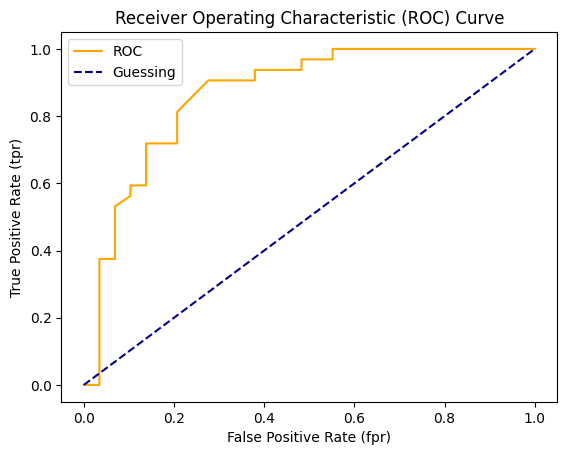

In [183]:
# create a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate (fpr) and true positive rate (tpr) of a model.
    """
    # plot roc curve
    plt.plot(fpr, tpr, color="orange", label="ROC")
    # plot line with no predictive power (baseline)
    plt.plot([0, 1], [0, 1], color="darkblue", linestyle="--", label="Guessing") # plot a line from (0,0) to (1,1)
    
    # customize the plot
    plt.xlabel("False Positive Rate (fpr)")
    plt.ylabel("True Positive Rate (tpr)")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()

plot_roc_curve(fpr, tpr) # plot the ROC curve

In [184]:
from sklearn.metrics import roc_auc_score # import the roc_auc_score function from the metrics module

roc_auc_score(y_test, y_probs_positive) # get the area under the ROC curve

0.8669181034482759

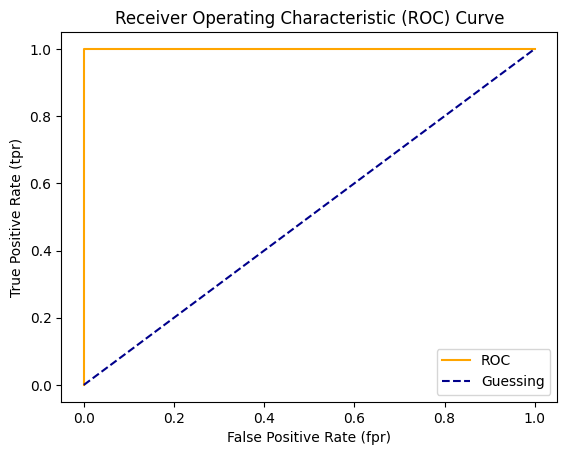

In [185]:
# plot perfect ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_test) # create a perfect ROC curve

plot_roc_curve(fpr, tpr) # plot the perfect ROC curve


In [186]:
# perfect AUC score
roc_auc_score(y_test, y_test) # get the perfect AUC score

1.0

***Confusion Matrix***

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict.

In essence, giving you an idea of where the model is getting confused.

compares number of true positives, true negatives, false positives, false negatives

learn more at the sklearn documentation: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

In [188]:
from sklearn.metrics import confusion_matrix # import the confusion_matrix function from the metrics module

y_preds = clf_model.predict(X_test) # get the predictions of the model on the test set

confusion_matrix(y_test, y_preds) # get the confusion matrix of the model
# confusion matrix is a matrix of the true labels and the predicted labels

array([[23,  6],
       [ 6, 26]])

In [189]:
# visualize confusion matrix with pd.crosstab()

pd.crosstab(y_test, # true labels, the labels of the test set, the first column
            y_preds,  # predicted labels, the second column
            rownames=["Actual Labels"], 
            colnames=["Predicted Labels"]) # create a confusion matrix with crosstab()

Predicted Labels,0,1
Actual Labels,,
0,23,6
1,6,26


In [191]:
# install seaborn package with conda install seaborn

import sys # import the sys module
!conda install --yes --prefix {sys.prefix} seaborn # install seaborn package with conda install seaborn

Retrieving notices: ...working... done
Solving environment: done

## Package Plan ##

  environment location: /Users/jjcatulle/miniconda3

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    blas-1.0                   |         openblas          10 KB
    bottleneck-1.3.5           |  py310h96f19d2_0         104 KB
    brotli-1.0.9               |       h1a28f6b_7          18 KB
    brotli-bin-1.0.9           |       h1a28f6b_7          17 KB
    contourpy-1.0.5            |  py310h525c30c_0         199 KB
    cycler-0.11.0              |     pyhd3eb1b0_0          12 KB
    fonttools-4.25.0           |     pyhd3eb1b0_0         632 KB
    freetype-2.12.1            |       h1192e45_0         570 KB
    giflib-5.2.1               |       h80987f9_3          78 KB
    jpeg-9e                    |       h80987f9_1         248 KB
    kiwisolver-1.4.4      

**old method of plotting a confusion matrix**

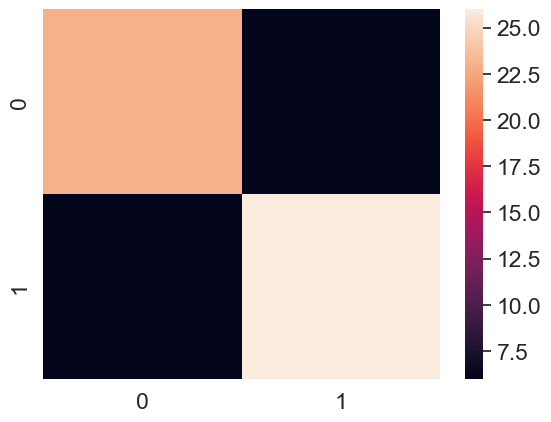

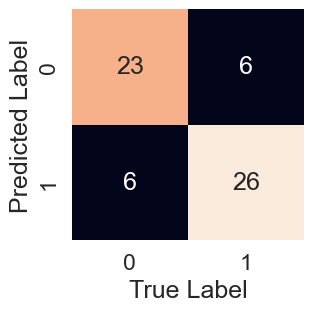

In [192]:
# Make our confusion matrix more visual with Seaborn's heatmap()

import seaborn as sns

# set the font scale
sns.set(font_scale=1.5)

# create a confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)

# plot it using Seaborn
sns.heatmap(conf_mat);

def plot_conf_mat(conf_mat):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(conf_mat,
                     annot=True, # annotate the boxes with conf_mat info
                     cbar=False)
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")

plot_conf_mat(conf_mat) # plot the confusion matrix

**new method for plotting confusion matrix**

In [195]:
import sklearn # import the sklearn module
sklearn.__version__ # show the versions of the packages used

'1.2.2'

In [196]:
clf_model # show the model

RandomForestClassifier()

In [202]:
len(X)

303

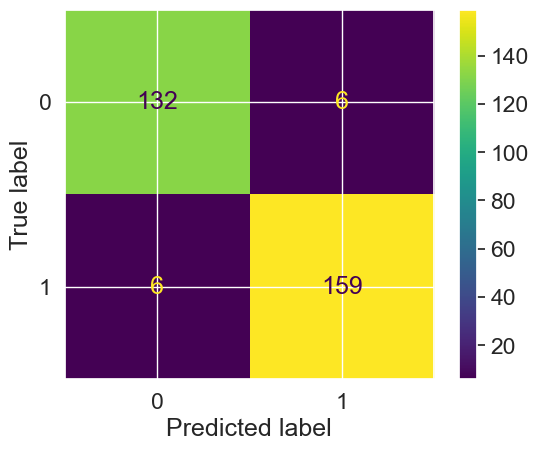

In [203]:
from sklearn.metrics import ConfusionMatrixDisplay # import the plot_confusion_matrix function from the metrics module

ConfusionMatrixDisplay.from_estimator(estimator=clf_model, X=X, y=y) # plot the confusion matrix

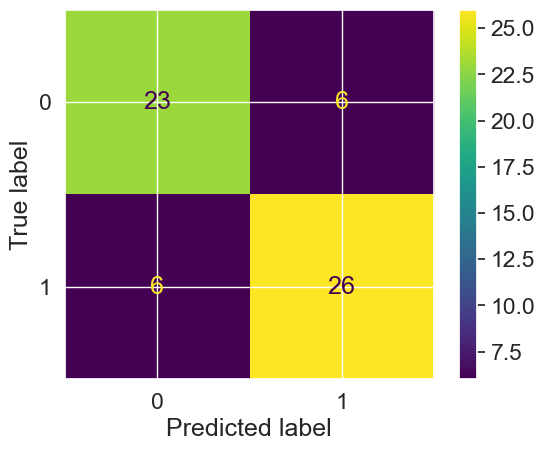

In [204]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_preds) # plot the confusion matrix from the predictions

### Classification report

sklearn classification report documentation: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

In [205]:
from sklearn.metrics import classification_report # import the classification_report function from the metrics module

print(classification_report(y_test, y_preds)) # print the classification report

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [206]:
# where precision and recall become valuable
disease_true = np.zeros(10000) # create an array of 10000 zeros
disease_true[0] = 1 # set the first value to 1, meaning the first patient has the disease

disease_preds = np.zeros(10000) # create an array of 10000 zeros

pd.DataFrame(classification_report(disease_true, # true labels
                                      disease_preds, # predicted labels
                                        output_dict=True)) # output the report as a dictionary

/Users/jjcatulle/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jjcatulle/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jjcatulle/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


To summarize classification metrics:

* **Accuracy** is a good measure to start with if all classes are balanced (e.g. same amount of samples which are labelled with 0 or 1)
* **Precision** and **recall** become more important when classes are imbalanced.
* If false positive predictions are worse than false negatives, aim for higher precision.
* If false negative predictions are worse than false positives, aim for higher recall.
* **F1-score** is a combination of precision and recall.

### 4.2.2 Regression model evaluation metrics

Model evaluation metrics documentation - https://scikit-learn.org/stable/modules/model_evaluation.html

The ones we're going to focus on:

1. R^2 (pronounced r-squared) or coefficient of determination.
2. Mean absolute error (MAE)
3. Mean squared error (MSE)

In [208]:
from sklearn.ensemble import RandomForestRegressor # import the RandomForestRegressor class from the ensemble module

np.random.seed(42) # set the random seed

X=housing_df.drop("target", axis=1) # drop the target column
y=housing_df["target"] # get the target column

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # split the data into training and test sets

model = RandomForestRegressor() # create a RandomForestRegressor model

model.fit(X_train, y_train) # fit the model



RandomForestRegressor()

In [209]:
model.score(X_test, y_test) # get the score of the model

0.8066196804802649

In [210]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [211]:
y_test

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
15362    2.63300
16623    2.66800
18086    5.00001
2144     0.72300
3665     1.51500
Name: target, Length: 4128, dtype: float64

In [212]:
y_test.mean()

2.0550030959302323

In [213]:
from sklearn.metrics import r2_score # import the r2_score function from the metrics module

# fill an array with the mean of y_test
y_test_mean = np.full(len(y_test), y_test.mean())

In [215]:
y_test_mean[:10] # get the first 10 values

array([2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031,
       2.0550031, 2.0550031, 2.0550031, 2.0550031])

In [216]:
r2_score(y_test, y_test_mean) # get the r2 score of the mean of y_test
# r2 score is the default score for the score() method of the regressor models


0.0

***Mean absolute error (MAE)***

MAE is the average of the absolute differences between predictions and actual values. 

It gives you an idea of how wrong your predictions were.



In [218]:
# MAE
from sklearn.metrics import mean_absolute_error # import the mean_absolute_error function from the metrics module

y_preds = model.predict(X_test) # get the predictions of the model on the test set
mae=mean_absolute_error(y_test, y_preds) # get the mean absolute error of the model
mae

0.3265721842781009

In [219]:
y_preds

array([0.49384  , 0.75494  , 4.9285964, ..., 4.8363785, 0.71782  ,
       1.67901  ])

In [220]:
np.array(y_test)

array([0.477  , 0.458  , 5.00001, ..., 5.00001, 0.723  , 1.515  ])

In [222]:
df=pd.DataFrame(data={"actual values": y_test, 
                      "predicted values": y_preds}) # create a dataframe with the actual and predicted values

df["differences"]=df["predicted values"]-df["actual values"] # create a column with the differences between the actual and predicted values

df.head(10)

,actual values,predicted values,differences
20046,0.47700,0.493840,0.016840
3024,0.45800,0.754940,0.296940
15663,5.00001,4.928596,-0.071414
20484,2.18600,2.540290,0.354290
9814,2.78000,2.331760,-0.448240
13311,1.58700,1.654970,0.067970
7113,1.98200,2.343230,0.361230
7668,1.57500,1.661820,0.086820
18246,3.40000,2.474890,-0.925110
5723,4.46600,4.834478,0.368478


In [223]:
df["differences"].mean() # get the mean of the differences

0.0121069218749996

In [224]:
# MAE
np.abs(df["differences"]).mean() # get the mean of the absolute differences

0.3265721842781009

In [226]:
mae

0.3265721842781009

**Mean Squared Error (MSE)**

MSE is the average of the squared differences between predictions and actual values.

In [227]:
# MSE
from sklearn.metrics import mean_squared_error # import the mean_squared_error function from the metrics module

y_preds = model.predict(X_test) # get the predictions of the model on the test set
mae=mean_squared_error(y_test, y_preds) # get the mean absolute error of the model
mae

0.2534073069137548

In [228]:
df["square_differences"]=np.square(df["differences"]) # create a column with the square of the differences between the actual and predicted values
df.head()

,actual values,predicted values,differences,square_differences
20046,0.47700,0.493840,0.016840,0.000284
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.540290,0.354290,0.125521
9814,2.78000,2.331760,-0.448240,0.200919


In [229]:
# Calculate MSE by hand
squared = np.square(df["differences"]) # square the differences

squared.mean() # get the mean of the squared differences

0.2534073069137548

In [230]:
df_large_error=df.copy() # create a copy of the dataframe

df_large_error.iloc[0]['square_differences']=16 # set the square of the difference of the first row to 16

df_large_error.head()

,actual values,predicted values,differences,square_differences
20046,0.47700,0.493840,0.016840,16.000000
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.540290,0.354290,0.125521
9814,2.78000,2.331760,-0.448240,0.200919


In [231]:
# Calculate MSE with the large error
df_large_error["square_differences"].mean() # get the mean of the squared differences

0.25728320720794084

In [232]:
df_large_error.iloc[1:100]=20 # set the square of the difference of row index 1-100 to 20
df_large_error

,actual values,predicted values,differences,square_differences
20046,0.47700,0.493840,0.016840,16.000000
3024,20.00000,20.000000,20.000000,20.000000
15663,20.00000,20.000000,20.000000,20.000000
20484,20.00000,20.000000,20.000000,20.000000
9814,20.00000,20.000000,20.000000,20.000000
...,...,...,...,...
15362,2.63300,2.220380,-0.412620,0.170255
16623,2.66800,1.947760,-0.720240,0.518746
18086,5.00001,4.836378,-0.163632,0.026775
2144,0.72300,0.717820,-0.005180,0.000027


In [234]:
# Calculate MSE with the large error
df_large_error["square_differences"].mean() # get the mean of the squared differences

0.7333540351264799

### 4.2.3 Finally using the scoring parameter

In [235]:
from sklearn.model_selection import cross_val_score # import the cross_val_score function from the model_selection module
from sklearn.ensemble import RandomForestClassifier # import the RandomForestClassifier class from the ensemble module

np.random.seed(42) # set the random seed

X=heart_disease.drop("target", axis=1) # drop the target column
y=heart_disease["target"] # get the target column

clf=RandomForestClassifier() # create a RandomForestClassifier model

In [236]:
np.random.seed(42) # set the random seed

# get the cross-validated accuracy of the model
# it will fit the model 5 times (cv=5) and use the training data to get the accuracy
# cv=5 means 5-fold cross-validation, which means the data will be split into 5 parts
cv_acc=cross_val_score(clf, X, y, cv=5, scoring=None) # get the cross-validated accuracy of the model
# scoring=None means the default scoring metric of the classifier will be used, which is accuracy for the RandomForestClassifier
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [237]:
# Cross-validated accuracy
print(f"The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%") # get the mean of the cross-validated accuracy

The cross-validated accuracy is: 82.48%


In [238]:
np.random.seed(42) # set the random seed

cv_acc=cross_val_score(clf, X, y, cv=5, scoring="accuracy") # get the cross-validated accuracy of the model
# scoring="accuracy" means the accuracy scoring metric will be used, which is the same as scoring=None
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [239]:
# Cross-validated accuracy
print(f"The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%") # get the mean of the cross-validated accuracy

The cross-validated accuracy is: 82.48%


In [240]:
# Precision
np.random.seed(42) # set the random seed

cv_precision=cross_val_score(clf, X, y, cv=5, scoring="precision") # get the cross-validated precision of the model
# scoring="precision" means the precision scoring metric will be used, which is the ratio of true positives to all positives

cv_precision

array([0.82352941, 0.93548387, 0.84848485, 0.79411765, 0.76315789])

In [242]:
# Cross-validated precision
print(f"The cross-validated precision is: {np.mean(cv_precision)*100:.2f}%") # get the mean of the cross-validated precision

The cross-validated precision is: 83.30%


In [243]:
# Recall

np.random.seed(42) # set the random seed

cv_recall=cross_val_score(clf, X, y, cv=5, scoring="recall") # get the cross-validated recall of the model
# scoring="recall" means the recall scoring metric will be used, recall is also called sensitivity, or true positive rate

cv_recall

array([0.84848485, 0.87878788, 0.84848485, 0.81818182, 0.87878788])

In [244]:
# Cross-validated recall
print(f"The cross-validated recall is: {np.mean(cv_recall)*100:.2f}%") # get the mean of the cross-validated recall

The cross-validated recall is: 85.45%


Let's see the `scoring` parameter being used for a regression problem...

In [245]:
from sklearn.model_selection import cross_val_score # import the cross_val_score function from the model_selection module
from sklearn.ensemble import RandomForestRegressor # import the RandomForestClassifier class from the ensemble module


np.random.seed(42) # set the random seed

X=housing_df.drop("target", axis=1) # drop the target column
y=housing_df["target"] # get the target column

model=RandomForestRegressor() # create a RandomForestRegressor model

In [246]:
np.random.seed(42) # set the random seed

# get the cross-validated r2 score of the model
# it will fit the model 3 times (cv=3) and use the training data to get the r2 score
# cv=3 means 3-fold cross-validation, which means the data will be split into 3 parts
cv_r2=cross_val_score(model, X, y, cv=3, scoring=None) # get the cross-validated r2 score of the model
# scoring=None means the default scoring metric of the regressor will be used, which is r2 for the RandomForestRegressor
np.mean(cv_r2) # get the mean of the cross-validated r2 score

0.6545756342466266

In [247]:
cv_r2

array([0.62159677, 0.72076221, 0.62136792])

In [248]:
# Mean absolute error
cv_mae=cross_val_score(model, X, y, cv=3, scoring="neg_mean_absolute_error") # get the cross-validated mean absolute error of the model
# scoring="neg_mean_absolute_error" means the mean absolute error scoring metric will be used, which is the mean of the absolute differences between the actual and predicted values
cv_mae

array([-0.52261147, -0.42493192, -0.50707973])

In [249]:
np.mean(cv_mae) # get the mean of the cross-validated mean absolute error

-0.48487437131782957

In [250]:
# Mean squared error
cv_mse=cross_val_score(model, X, y, cv=3, scoring="neg_mean_squared_error") # get the cross-validated mean squared error of the model
# scoring="neg_mean_squared_error" means the mean squared error scoring metric will be used, which is the mean of the squared differences between the actual and predicted values
cv_mse

array([-0.51324679, -0.32925916, -0.54118007])

In [251]:
np.mean(cv_mse) # get the mean of the cross-validated mean squared error

-0.461228671470042

## 4.3 Evaluating a model using problem-specific metric functions

The 3rd way of evaluating Scikit-Learn models outside of the `score()` function and `scoring` parameter is with problem-specific metric functions.

learn more about classification metrics: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

In [253]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42) # set the random seed

X=heart_disease.drop("target", axis=1) # drop the target column
y=heart_disease["target"] # get the target column

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2) # split the data into training and test sets

model=RandomForestClassifier() # create a RandomForestClassifier model

model.fit(X_train, y_train) # fit the model on the training data

y_preds=model.predict(X_test) # predict the target values of the test set

# Evaluate midel using evaluation functions
print("Classifier metrics on the test set:")
print(f"Accuracy: {accuracy_score(y_test, y_preds)*100:.2f}%") # get the accuracy of the model
print(f"Precision: {precision_score(y_test, y_preds)*100:.2f}%") # get the precision of the model
print(f"Recall: {recall_score(y_test, y_preds)*100:.2f}%") # get the recall of the model
print(f"F1: {f1_score(y_test, y_preds)*100:.2f}%") # get the f1 score of the model

Classifier metrics on the test set:
Accuracy: 85.25%
Precision: 84.85%
Recall: 87.50%
F1: 86.15%


In [255]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42) # set the random seed

X=housing_df.drop("target", axis=1) # drop the target column
y=housing_df["target"] # get the target column

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2) # split the data into training and test sets

model=RandomForestRegressor() # create a RandomForestClassifier model

model.fit(X_train, y_train) # fit the model on the training data


y_preds=model.predict(X_test) # predict the target values of the test set

# Evaluate midel using evaluation functions
print("Regression metrics on the test set:")
print(f"R^2: {r2_score(y_test, y_preds)*100:.2f}%") # get the r2 score of the model
print(f"MAE: {mean_absolute_error(y_test, y_preds)*100:.2f}%") # get the mean absolute error of the model
print(f"MSE: {mean_squared_error(y_test, y_preds)*100:.2f}%") # get the mean squared error of the model

Regression metrics on the test set:
R^2: 80.66%
MAE: 32.66%
MSE: 25.34%


## 5. Improving a model

First predictions = baseline predictions.
First model = baseline model.

From a data perspective:

* Could we collect more data? (generally, the more data, the better)
* Could we improve our data?

From a model perspective:

* Is there a better model we could use?
* Could we improve the current model?

Hyperparameters vs. Parameters

* Parameters = model find these patterns in data
* Hyperparameters = settings on a model you can adjust to (potentially) improve its ability to find patterns

Three ways to adjust hyperparameters:

1. By hand
2. Randomly with RandomSearchCV
3. Exhaustively with GridSearchCV


In [257]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier() # create a RandomForestClassifier model

In [258]:
clf.get_params() # get the hyperparameters of the model

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

## 5.1 Tuning hyperparameters by hand

Let's make 3 sets, training, validation and test sets.

In [260]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

we're going to try and adjust:

* `max_depth`
* `max_features`
* `min_samples_leaf`
* `min_samples_split`
* `n_estimators`


In [261]:
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels
    on a classification.
    """
    accuracy=accuracy_score(y_true, y_preds) # get the accuracy of the model
    precision=precision_score(y_true, y_preds) # get the precision of the model
    recall=recall_score(y_true, y_preds) # get the recall of the model
    f1=f1_score(y_true, y_preds) # get the f1 score of the model
    metric_dict={"accuracy": round(accuracy, 2),
                 "precision": round(precision, 2),
                 "recall": round(recall, 2),
                 "f1": round(f1, 2)} # create a dictionary of the metrics
    print(f"Accuracy: {accuracy*100:.2f}%") # print the accuracy
    print(f"Precision: {precision*100:.2f}%") # print the precision
    print(f"Recall: {recall*100:.2f}%") # print the recall
    print(f"F1 score: {f1*100:.2f}%") # print the f1 score
    return metric_dict # return the dictionary of the metrics

In [262]:
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [264]:
from sklearn.ensemble import RandomForestClassifier # import the RandomForestClassifier model

np.random.seed(42) # set the random seed

# Shuffle the data
heart_disease_shuffled=heart_disease.sample(frac=1) # shuffle the data, frac=1 means shuffle all the data, frac=0.5 means shuffle half of the data

# Split into X & y
X=heart_disease_shuffled.drop("target", axis=1) # drop the target column
y=heart_disease_shuffled["target"] # get the target column

# Split the data into train, validation & test sets
train_split=round(0.7 * len(heart_disease_shuffled)) # get 70% of the data
valid_split=round(train_split + 0.15 * len(heart_disease_shuffled)) # get 15% of the data

X_train, y_train=X[:train_split], y[:train_split] # get the training data, 70% of the data
X_valid, y_valid=X[train_split:valid_split], y[train_split:valid_split] # get the validation data, 15% of the data
X_test, y_test=X[valid_split:], y[valid_split:] # get the test data, 15% of the data

clf = RandomForestClassifier() # create a RandomForestClassifier model

clf.fit(X_train, y_train) # fit the model on the training data

# Make baseline predictions
y_preds=clf.predict(X_valid) # predict the target values of the validation set

# Evaluate the classifier on validation set
baseline_metrics=evaluate_preds(y_valid, y_preds) # evaluate the model
baseline_metrics

Accuracy: 82.22%
Precision: 81.48%
Recall: 88.00%
F1 score: 84.62%


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

In [269]:
np.random.seed(42) # set the random seed

# Create a second classifier with different hyperparameters
clf_2=RandomForestClassifier(n_estimators=100) # create a RandomForestClassifier model with 100 estimators

clf_2.fit(X_train, y_train) # fit the model on the training data

# Make predictions with different hyperparameters
y_preds_2=clf_2.predict(X_valid) # predict the target values of the validation set

# Evaluate the 2nd classifier
clf_2_metrics=evaluate_preds(y_valid, y_preds_2) # evaluate the model
clf_2_metrics

Accuracy: 82.22%
Precision: 84.00%
Recall: 84.00%
F1 score: 84.00%


{'accuracy': 0.82, 'precision': 0.84, 'recall': 0.84, 'f1': 0.84}

### 5.2 Hyperparameter tuning with RandomizedSearchCV

In [272]:
from sklearn.model_selection import RandomizedSearchCV

grid={"n_estimators": [10, 100, 200, 500, 1000, 1200], # create a dictionary of the hyperparameters
        "max_depth": [None, 5, 10, 20, 30],
        "max_features": ["auto", "sqrt"],
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf": [1, 2, 4]}

np.random.seed(42) # set the random seed

# Split into X & y
X=heart_disease_shuffled.drop("target", axis=1) # drop the target column
y=heart_disease_shuffled["target"] # get the target column

# Split into train & test sets
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2) # split the data into training and test sets

# Instantiate RandomForestClassifier
clf=RandomForestClassifier(n_jobs=1) # create a RandomForestClassifier model, n_jobs=1 means use 1 core of the CPU

# Setup RandomizedSearchCV
rs_clf=RandomizedSearchCV(estimator=clf, # create a RandomizedSearchCV model
                            param_distributions=grid, # use the grid of hyperparameters
                            n_iter=10, # take our model try 10 different combinations of hyperparameters and see which one performs the best
                            cv=5, # 5-fold cross-validation
                            verbose=2) # print out the results

# Fit the RandomizedSearchCV version of clf
rs_clf.fit(X_train, y_train) # fit the model on the training data

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   0.7s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   0.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   0.7s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   0.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   0.6s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100

/Users/jjcatulle/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/jjcatulle/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/jjcatulle/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this para

[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s


/Users/jjcatulle/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s


/Users/jjcatulle/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/jjcatulle/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/jjcatulle/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this para

[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_sam

/Users/jjcatulle/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/jjcatulle/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/jjcatulle/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this para

[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   0.3s
[CV] END max_depth=None, max_features=s

/Users/jjcatulle/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/jjcatulle/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=200; total time=   0.1s


/Users/jjcatulle/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/jjcatulle/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=200; total time=   0.1s


/Users/jjcatulle/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=   0.6s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=   0.5s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=   0.5s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=   0.5s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=   0.5s


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   verbose=2)

In [273]:
rs_clf.best_params_ # get the best hyperparameters

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [274]:
# Make predictions with the best hyperparameters
rs_y_preds=rs_clf.predict(X_test) # predict the target values of the test set

# Evaluate the predictions
rs_metrics=evaluate_preds(y_test, rs_y_preds) # evaluate the model

Accuracy: 81.97%
Precision: 77.42%
Recall: 85.71%
F1 score: 81.36%


### 5.3 Hyperparameter tuning with GridSearchCV

In [275]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [276]:
grid_2={"n_estimators": [100, 200, 500], # create a dictionary of the hyperparameters
        "max_depth": [None],
        "max_features": ["auto", "sqrt"],
        "min_samples_split": [6],
        "min_samples_leaf": [1, 2]}

In [277]:
from sklearn.model_selection import GridSearchCV, train_test_split

np.random.seed(42) # set the random seed

# Split into X & y
X=heart_disease_shuffled.drop("target", axis=1) # drop the target column
y=heart_disease_shuffled["target"] # get the target column

# Split into train & test sets
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2) # split the data into training and test sets

# Instantiate RandomForestClassifier
clf=RandomForestClassifier(n_jobs=1) # create a RandomForestClassifier model, n_jobs=1 means use 1 core of the CPU

# Setup GridSearchCV
gs_clf=GridSearchCV(estimator=clf, # create a GridSearchCV model
                    param_grid=grid_2, # use the grid of hyperparameters
                    cv=5, # 5-fold cross-validation
                    verbose=2) # print out the results

# Fit the GridSearchCV version of clf
gs_clf.fit(X_train, y_train) # fit the model on the training data

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s


/Users/jjcatulle/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/jjcatulle/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/jjcatulle/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this para

[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.1s


/Users/jjcatulle/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/jjcatulle/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/jjcatulle/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this para

[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.1s


/Users/jjcatulle/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/jjcatulle/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.1s


/Users/jjcatulle/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/jjcatulle/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.3s


/Users/jjcatulle/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.3s


/Users/jjcatulle/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.3s


/Users/jjcatulle/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.3s


/Users/jjcatulle/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.3s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.1s


/Users/jjcatulle/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/jjcatulle/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/jjcatulle/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this para

[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.1s


/Users/jjcatulle/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/jjcatulle/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/jjcatulle/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this para

[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.1s


/Users/jjcatulle/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/jjcatulle/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.1s


/Users/jjcatulle/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/jjcatulle/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   0.3s


/Users/jjcatulle/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   0.3s


/Users/jjcatulle/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   0.3s


/Users/jjcatulle/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   0.3s


/Users/jjcatulle/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=None,

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
             param_grid={'max_depth': [None], 'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2], 'min_samples_split': [6],
                         'n_estimators': [100, 200, 500]},
             verbose=2)

In [278]:
gs_clf.best_params_ # get the best hyperparameters

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 200}

In [279]:
gs_y_preds=gs_clf.predict(X_test) # predict the target values of the test set

# Evaluate the predictions
gs_metrics=evaluate_preds(y_test, gs_y_preds) # evaluate the model

Accuracy: 78.69%
Precision: 74.19%
Recall: 82.14%
F1 score: 77.97%


Let's compare our different models metrics.

In [294]:
compare_metrics=pd.DataFrame({"baseline": baseline_metrics, # create a dataframe of the metrics
                                "clf_2": clf_2_metrics,
                                "random search": rs_metrics,
                                "grid search": gs_metrics})

print(compare_metrics.dtypes) # print the dataframe
compare_metrics

baseline         float64
clf_2            float64
random search    float64
grid search      float64
dtype: object


,baseline,clf_2,random search,grid search
accuracy,0.82,0.82,0.82,0.79
precision,0.81,0.84,0.77,0.74
recall,0.88,0.84,0.86,0.82
f1,0.85,0.84,0.81,0.78


In [300]:
compare_metrics.plot.bar(figsize=(10, 8)); # plot the dataframe

AttributeError: 'DataFrame' object has no attribute '_convert'

## 6. Saving and loading trained machine learning models

Two ways to save and load machine learning models:

1. With Python's `pickle` module
2. With the `joblib` module


**pickle**

In [302]:
import pickle

# Save an existing model to file
pickle.dump(gs_clf, open("gs_random_forest_model_1.pkl", "wb")) # save the model to a file

In [303]:
# Load a saved model
loaded_pickle_model=pickle.load(open("gs_random_forest_model_1.pkl", "rb")) # load the model from a file

In [305]:
# Make some predictions
pickle_y_preds=loaded_pickle_model.predict(X_test) # predict the target values of the test set
evaluate_preds(y_test, pickle_y_preds) # evaluate the model

Accuracy: 78.69%
Precision: 74.19%
Recall: 82.14%
F1 score: 77.97%


{'accuracy': 0.79, 'precision': 0.74, 'recall': 0.82, 'f1': 0.78}

**Joblib**

In [306]:
from joblib import dump, load

# Save model to file
dump(gs_clf, filename="gs_random_forest_model_1.joblib") # save the model to a file

['gs_random_forest_model_1.joblib']

In [307]:
# Import a saved joblib model
loaded_joblib_model=load(filename="gs_random_forest_model_1.joblib") # load the model from a file

In [308]:
# Make and evaluate joblib predictions
joblib_y_preds=loaded_joblib_model.predict(X_test) # predict the target values of the test set
evaluate_preds(y_test, joblib_y_preds) # evaluate the model

Accuracy: 78.69%
Precision: 74.19%
Recall: 82.14%
F1 score: 77.97%


{'accuracy': 0.79, 'precision': 0.74, 'recall': 0.82, 'f1': 0.78}

## 7. Putting it all together

In [309]:
data=pd.read_csv("../data/car-sales-extended-missing-data.csv") # load the data
data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [310]:
data.dtypes # get the data types of the columns

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [311]:
data.isna().sum() # get the number of missing values in each column

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

steps we want to do (all in one cell):

1. Fill missing data
2. Convert data to numbers
3. Build a model on the data

In [312]:
# get the data ready
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# Setup random seed
import numpy as np
np.random.seed(42)

# Import data and drop rows with missing labels
data=pd.read_csv("../data/car-sales-extended-missing-data.csv") # load the data
data.dropna(subset=["Price"], inplace=True) # drop the rows with missing values in the Price column

# Define different features and transformer pipeline
categorical_features=["Make", "Colour"] # create a list of the categorical features

# pipeline takes some steps and applies them to the data, the steps are a list of tuples,
# the first item in the tuple is the name of the step, the second item is the transformer to be applied
categorical_transformer=Pipeline(steps=[ # create a pipeline for the categorical features
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")), # impute the missing values with the string "missing"
    ("onehot", OneHotEncoder(handle_unknown="ignore"))]) # one-hot encode the categorical features

door_feature=["Doors"] # create a list of the door feature
door_transformer=Pipeline(steps=[ # create a pipeline for the door feature
    ("imputer", SimpleImputer(strategy="constant", fill_value=4))]) # impute the missing values with the number 4

numeric_features=["Odometer (KM)"] # create a list of the numeric features
numeric_transformer=Pipeline(steps=[ # create a pipeline for the numeric features
    ("imputer", SimpleImputer(strategy="mean"))]) # impute the missing values with the mean

# Setup preprocessing steps (fill missing values, then convert to numbers)
preprocessor=ColumnTransformer( # create a column transformer
    transformers=[ # create a list of the transformers
        ("cat", categorical_transformer, categorical_features), # apply the categorical transformer to the categorical features
        ("door", door_transformer, door_feature), # apply the door transformer to the door feature
        ("num", numeric_transformer, numeric_features)]) # apply the numeric transformer to the numeric features

# Creating a preprocessing and modelling pipeline
# create a pipeline for the preprocessing steps and the model
model=Pipeline(steps=[("preprocessor", preprocessor), # create a pipeline for the preprocessing steps
                        ("model", RandomForestRegressor())]) # create a pipeline for the model

# Split data
X=data.drop("Price", axis=1) # drop the Price column
y=data["Price"] # get the Price column

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2) # split the data into training and test sets

# Fit and score the model
model.fit(X_train, y_train) # fit the model on the training data
model.score(X_test, y_test) # evaluate the model on the test data

0.22188417408787875

It's also possible to use `GridSearchCV` or `RandomizedSearchCV` with our `Pipeline`.

In [313]:
# Use GridSearchCV with our regression Pipeline
pipe_grid={"preprocessor__num__imputer__strategy": ["mean", "median"], # create a grid of hyperparameters
            "model__n_estimators": [100, 1000], # create a grid of hyperparameters
            "model__max_depth": [None, 5], # create a grid of hyperparameters
            "model__max_features": ["auto"], # create a grid of hyperparameters
            "model__min_samples_split": [2, 4]} # create a grid of hyperparameters

gs_model=GridSearchCV(model, pipe_grid, cv=5, verbose=2) # create a GridSearchCV model

gs_model.fit(X_train, y_train) # fit the model on the training data


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s


/Users/jjcatulle/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/jjcatulle/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s


/Users/jjcatulle/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/jjcatulle/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s


/Users/jjcatulle/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/jjcatulle/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.1s


/Users/jjcatulle/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/jjcatulle/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.1s


/Users/jjcatulle/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/jjcatulle/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.1s


/Users/jjcatulle/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   1.2s


/Users/jjcatulle/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   1.1s


/Users/jjcatulle/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   1.1s


/Users/jjcatulle/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   1.1s


/Users/jjcatulle/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   1.1s


/Users/jjcatulle/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   1.1s


/Users/jjcatulle/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   1.1s


/Users/jjcatulle/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   1.1s


/Users/jjcatulle/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   1.1s


/Users/jjcatulle/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   1.1s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s


/Users/jjcatulle/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/jjcatulle/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/jjcatulle/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it i

[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s


/Users/jjcatulle/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/jjcatulle/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.1s


/Users/jjcatulle/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/jjcatulle/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.1s


/Users/jjcatulle/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/jjcatulle/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.1s


/Users/jjcatulle/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/jjcatulle/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   1.0s


/Users/jjcatulle/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   1.0s


/Users/jjcatulle/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   0.9s


/Users/jjcatulle/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   1.0s


/Users/jjcatulle/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   1.0s


/Users/jjcatulle/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   1.0s


/Users/jjcatulle/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   1.0s


/Users/jjcatulle/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   1.0s


/Users/jjcatulle/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   0.9s


/Users/jjcatulle/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   1.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s


/Users/jjcatulle/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/jjcatulle/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/jjcatulle/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it i

[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s


/Users/jjcatulle/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/jjcatulle/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/jjcatulle/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it i

[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.1s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.1s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.1s


/Users/jjcatulle/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/jjcatulle/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/jjcatulle/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it i

[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.1s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.1s


/Users/jjcatulle/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/jjcatulle/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   0.7s


/Users/jjcatulle/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   0.7s


/Users/jjcatulle/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   0.7s


/Users/jjcatulle/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   0.7s


/Users/jjcatulle/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   0.8s


/Users/jjcatulle/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   0.7s


/Users/jjcatulle/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   0.7s


/Users/jjcatulle/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   0.7s


/Users/jjcatulle/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   0.7s


/Users/jjcatulle/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   0.7s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s


/Users/jjcatulle/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/jjcatulle/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/jjcatulle/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it i

[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s


/Users/jjcatulle/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/jjcatulle/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/jjcatulle/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it i

[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.1s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.1s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.1s


/Users/jjcatulle/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/jjcatulle/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/jjcatulle/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it i

[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.1s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.1s


/Users/jjcatulle/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/jjcatulle/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   0.8s


/Users/jjcatulle/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   0.7s


/Users/jjcatulle/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   0.7s


/Users/jjcatulle/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   0.7s


/Users/jjcatulle/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   0.8s


/Users/jjcatulle/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   0.7s


/Users/jjcatulle/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   0.7s


/Users/jjcatulle/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   0.7s


/Users/jjcatulle/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   0.7s


/Users/jjcatulle/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   0.7s


/Users/jjcatulle/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value=4,
                                                                                                        strategy='constant'))]),
                                                                         ['Doors']),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer())]),
                                                                         ['Odometer '
                                                                          '(KM)'])])),
                                       ('model', RandomForestRegressor())]),
             param_grid={'model__max_depth': [None, 5],
                         'model__max_features': ['auto'],
                         'model__min_samples_split': [2, 4],
                         'model__n_estimators': [100, 1000],
                         'preprocessor__num__imputer__strategy': ['mean',
                                                                  'median']},
             verbose=2)

In [314]:
gs_model.score(X_test, y_test) # evaluate the model on the test data

0.3339554263158365

In [315]:
what_were_covering

['0. An end-to-end Scikit-Learn workflow',
 '1. Getting the data ready',
 '2. Choose the right estimator/algorithm for our problems',
 '3. Fit the model/algorithm and use it to make predictions on our data',
 '4. Evaluating a model',
 '5. Improve a model',
 '6. Save and load a trained model',
 '7. Putting it all together!']